In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [84]:
dfx = pd.read_csv("../data/weightedX.csv",names=["x"])
dfy = pd.read_csv("../data/weightedY.csv",names=["y"])

In [85]:
X= dfx.values
Y = dfy.values

In [23]:
print(X.shape,Y.shape)

(100, 1) (100, 1)


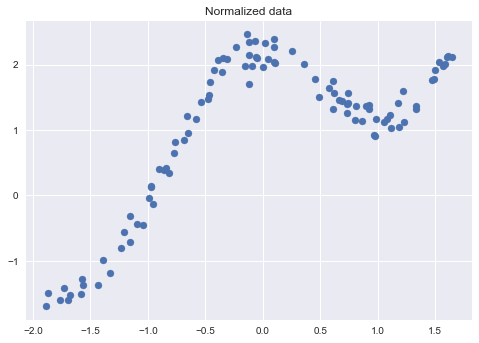

In [29]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.title("Normalized data")
plt.show()

In [86]:
u = X.mean()
std = X.std()
X = (X - u)/std

### W(m x m ) digonal matrix

In [37]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    # W = e^((x-xi)^2/(-2*tau^2))  // weight at each point acc to dis from query point 
    for i in range(M):
        W[i,i] = np.exp(np.dot(X[i]-query_point,(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [88]:
X_temp = X
Y_temp = Y
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
W= getW(-1,X,1)

In [62]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    qx = np.mat([query_x,1])
    W = getW(qx,X_,tau)
    #theta = (X'WX)inv* X'WY
    theta = np.linalg.pinv( X_.T * (W * X_))* (X_.T * (W * Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [65]:
predict(X,Y,1,0.2)

(matrix([[-0.17824629],
         [ 1.42082671]]),
 matrix([[1.24258042]]))

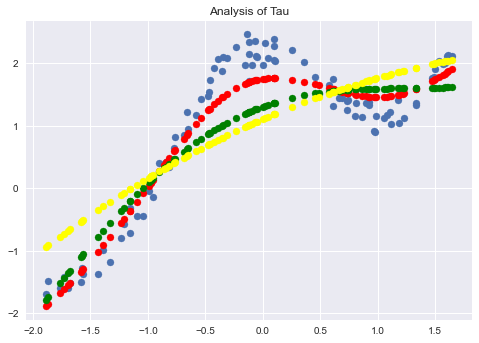

In [101]:
plt.title("Analysis of Tau/Bandwidth Parameter")
plt.scatter(X_temp,Y_temp)
m = X_temp.shape[0]
for i in range(m):
    theta, value = predict(X,Y,X_temp[i][0],0.5);
    plt.scatter(X_temp[i][0],value[0,0],color="red")
for i in range(m):
    theta, value = predict(X,Y,X_temp[i][0],1);
    plt.scatter(X_temp[i][0],value[0,0],color="green")
for i in range(m):
    theta, value = predict(X,Y,X_temp[i][0],2);
    plt.scatter(X_temp[i][0],value[0,0],color="yellow")
plt.show()

-0.5817245118054017